# Trabalho 1

Cálculo Numérico - SME0104

Professora Cynthia Lage Ferreira

Alunos:
* João Pedro Buzzo Silva
* Miguel Bragante Henriques

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Exercício 1

In [ ]:
##
# A função func1 recebe uma matriz A e realiza a decomposição LU dela,
# retornando as matrizes L e U obtidas.
##
def func1(A):
  # Obtendo parâmetros iniciais para a decomposição LU
  n = A.shape[0] # Número de linhas da matriz A
  U = A.copy() # Cópia de A
  L = np.eye(n) # Matriz identidade n x n

  # Fazendo a decomposição LU considerando TODOS os termos de A.
  # Calcula até sobre os termos nulos de A, que são muitos a mais do que
  # os não-nulos
  for j in range(n - 1):
    for i in range(j + 1, n):
      L[i, j] = U[i ,j]/U[j ,j]
      U[i ,j: n] = U[i, j: n] - L[i, j]*U[j, j: n]
  return L, U

##
# A função func2 recebe um limitador p e uma matriz A, retornando as
# matrizes L e U da sua decomposição LU.
# O limitador é responsável por reduzir o espaço de iterações dos loops
# da decomposição LU.
##
def func2(A, p):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # O primeiro loop mantém-se inalterado
  for j in range(n - 1):
    ##
    # O cálculo de v leva em conta o limitador p. Não é interessante
    # calcular os termos de L e U para além desse limite j+p+1, pois
    # é dado que a matriz A possui termos nulos nas posições j+p+k,
    # com k = 2, 3, ...
    # Dessa forma, o loop fica significativamente mais eficiente
    # com n grande.
    ##
    v = min(n, j + p + 1)

    # O loop então leva enconta apenas os termos não-nulos de A
    for i in range(j + 1, v):
      L[i, j] = U[i, j]/U[j, j]
      U[i, j: v] = U[i, j: v] - L[i, j]*U[j, j: v]
  return L, U

In [ ]:
# Exemplo
n = 2000
p = 2
A = np.zeros((n, n)) # Matriz inicial nula

# Matriz n x n aleatória
for i in range(n):
  ##
  # O loop abaixo limita uma vizinhança para a diagonal
  # de A. Seja A_kk elemento da diagonal, todo elemento
  # no intervalo [k-p, k+p] é não-nulo. Se o elemento esta
  # fora do intervalo, ele não é recalculado e, portanto,
  # é nulo.
  ##
  for j in range(max(0, i - p), min(n, i + p + 1)):
    A[i, j] = np.random.normal()

# Utilizando a função 1 e obtendo o tempo de execução
starttime = time.time()
L, U = func1(A)
endtime = time.time()
print(f"Tempo da LU: {endtime - starttime}")

# Utilizando a função 2 e obtendo o tempo de execução
starttime = time.time()
L_, U_ = func2(A, p)
endtime = time.time()
print(f"Tempo da LU limitada: {endtime - starttime}")

print(np.linalg.norm(L @ U - A))
print(np.linalg.norm(L_ @ U_ - A))

Tempo da LU: 19.28245973587036
Tempo da LU limitada: 0.07775664329528809
7.39986656100952e-12
7.39986656100952e-12


### Sobre decomposição LU e o Exercício 1

A <u>decomposição LU</u> (Método de Doolittle) é uma técnica utilizada para decompor uma matriz $A$ em duas matrizes:

* $U$, a matriz triangular superior;
* $L$, a matriz triangular inferior.

Dessa forma, a matriz $A$ pode ser representada como:

* $A = L U$.

Tendo a matriz $A_{nn}$, como é o caso do Exercício 1, podemos obter as matrizes $L$ e $U$ da seguinte maneira:

* $u_{ij} = a_{ij} - \sum_{k=1}^{i-1} l_{ik}u_{kj}$ , com $j \ge i$;

* $l_{ij} = \frac{a_{ij}-\sum_{k=1}^{j-1} l_{ik}u_{kj}}{u_{jj}}$, com $i > j$.

No código, os loops *for* são responsáveis por fazer esse somatório, fazendo a decomposição LU da matriz de entrada $A$.

No exemplo do Exercício 1, é calculado o tempo de execução desse método para decompor uma matriz $A$ de tamanho $2000 × 2000$, que possui elementos não nulos apenas em uma vizinhança $p$ da sua diagonal principal. O método é aplicado de duas formas diferentes:

* Na função *func1*, é feita a decomposição LU convencional, que é lenta e demora cerca de 20 segundos para este caso. Isso ocorre, pois são considerados todos os valores da matriz $A$, sendo realizados muitos somatórios (*loops*).

* Na função *func2*, é feita uma decomposição LU diferente, que leva em conta apenas os valores dentro da vizinhança $p$. Dessa forma, os valores nulos são ignorados, sendo uma função muito mais eficiente e que dura cerca de 0,08 segundos.

## Exercício 2

In [ ]:
# Funções

##
# Função que calcula a matriz C e o vetor g do método
# Gauss-Jacobi
##
def Gauss_Jacobi(A, b):
  n = A.shape[0]
  D = np.diagflat(np.diag(A)) # Matriz com os elementos da diagonal principal de A

  # Para calcular C, é preciso subtrair de uma matriz identidade o resultado
  # de um sistema linear do tipo Dx = A. Ou seja, multiplicamos a matriz A pelo
  # inverso da matriz D.
  C = np.eye(n) - np.linalg.solve(D, A)

  # Para calcular g, basta multiplicar o vetor b pelo inverso da matriz D
  g = np.linalg.solve(D, b)

  return C, g

##
# Função que calcula a matriz C e o vetor g do método
# Gauss-Seidel
##
def Gauss_Seidel(A, b):
  n = A.shape[0]
  L = np.tril(A) # Matriz triangular inferior
  R = np.triu(A) # Matriz triangular superior
  # Ajuste da triangular superior para que a diagonal seja 0
  R = R - np.diagflat(np.diag(R))

  # Resolvendo o sistema LC = R, encontramos a matriz C
  C = np.linalg.solve(L, (-1)*R)
  C = C.round(8)
  for i in range(n):
    for j in range(n):
      if C[i, j] == -0.0:
        C[i, j] = 0.0
  # Resolvendo o sistema Lg = b, encontramos o vetor g
  g = np.linalg.solve(L, b)

  return C, g

##
# Função que testa a convergência da matriz A pro método
# de Gauss-Jacobi utilizando o critério das linhas
##
def GJ_convergence(A):
  n = A.shape[0]
  rows = np.zeros(n) # As linhas são inicializadas como 0

  # Pra cada linha, soma os elementos de A, subtrai-se o elemento
  # [i,i] e então divide o resultado pelo elemento [i,i]
  for i in range(n):
    rows[i] = np.sum(np.absolute(A[i])) - abs(A[i, i])
    rows[i] /= abs(A[i, i])

  rows = np.sort(rows)

  # O retorno é a condicional do maior elemento do critério ser menor que 1.
  # Se é menor do que 1, o método irá convergir com a matriz A.
  return rows[-1] < 1

##
# Função que testa a convergência da matriz A pro método
# de Gauss-Seidel utilizando o critério das linhas
##
def GS_convergence(A):
  n = A.shape[0]
  rows = np.zeros(n) # As linhas são inicializadas como 0

  # Calcula-se a primeira linha utilizando o mesmo processo do critério
  # de convergência de Gauss-Jacobi
  rows[0] = np.sum(np.absolute(A[0])) - abs(A[0, 0])
  rows[0] /= abs(A[0, 0])

  # Para as linhas seguintes, o cálculo do elemento depende do resultado
  # da linha anterior.
  for i in range(1, n):
    # Para o intervalo [0,i-1] soma-se o produto dos elementos das linhas
    # anteriores com os elementos da linha da matriz A
    rows[i] += np.sum([rows[j]*abs(A[i, j]) for j in range(i)])
    # Os elementos de A no intervalo [i+1, n] são somados e então divide-se
    # o resultado por A[i,i]
    rows[i] += np.sum([abs(A[i, j]) for j in range(i+1, n)])
    rows[i] /= abs(A[i, i])

  rows = np.sort(rows)

  # O retorno é a condicional do maior elemento do critério ser menor que 1.
  # Se é menor do que 1, o método irá convergir com a matriz A.
  return rows[-1] < 1

##
# Função que reolve o sistema x_(n+1) = Cx_(n) + g
# A calcula novos valores de x_(n+1) até que se atinja a tolerância definida
# e armazena o erro calculado a cada iteração, retornando o x final e o array
# de erros.
##
def solve(x0, C, g, tol):
  erroL = []
  x = C@x0 + g
  erro = np.linalg.norm(x-x0)
  erroL.append(erro)

  while erro > tol:
    x0 = x
    x = C@x0 + g
    erro = np.linalg.norm(x-x0)
    erroL.append(erro)

  # Transformando o erro em um array do numpy para utilizar as propriedades
  # do numpy
  erroL = np.array(erroL)

  return x, erroL

In [ ]:
# Dados:
A = np.array([[ 4, -2,  1,  0,  0,  0],
              [-2,  7, -2,  1,  0,  0],
              [ 1, -2,  7, -2,  1,  0],
              [ 0,  1, -2,  7, -2,  1],
              [ 0,  0,  1, -2,  7, -2],
              [ 0,  0,  0,  1, -2,  4]])
b = np.transpose([-1, -2, 1, 1, -2, -1])

# a)
# Queremos determinar as matrizes C e os vetores g de ambos os métodos de
# Gauss-Jacobi e Gauss-Seidel. Calculamos então utilizando as funções definidas
# na célula acima.
#
C_GJ, g_GJ = Gauss_Jacobi(A, b)
C_GS, g_GS = Gauss_Seidel(A, b)

print("A matriz C e o vetor g obtidos no método Gauss-Jacobi são, respectivamente:")
print(f"C_GJ = \n{C_GJ}\n")
print(f"g_GJ = \n{g_GJ}\n")

print("A matriz C e o vetor g obtidos no método Gauss-Seidel são, respectivamente:")
print(f"C_GS = \n{C_GS}\n")
print(f"g_GS = \n{g_GS}\n")

A matriz C e o vetor g obtidos no método Gauss-Jacobi são, respectivamente:
C_GJ = 
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]

g_GJ = 
[-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]

A matriz C e o vetor g obtidos no método Gauss-Seidel são, respectivamente:
C_GS = 
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.          0.14285714  0.21428571 -0.14285714  0.          0.        ]
 [ 0.         -0.03061224  0.09693878  0.24489796 -0.14285714  0.        ]
 [ 0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.1428571

Para utilizarmos o <u>Método de Gauss-Jacobi</u> devemos determinar a matriz $C_{GJ}$ e o vetor $g_{GJ}$. Para isso utilizamos duas matrizes:


*   $A$: a própria matriz fornecida.
*   $D$: a matriz que contém apenas os elementos da diagonal principal de $A$ em sua diagonal principal.

Dessa forma, podemos utilizar a relação:

\begin{equation}
  Ax = b \\
  (A-D)x^{k} + Dx^{k+1} = b \\
  x^{k+1} = (I-D^{-1}A)x^{k} + D^{-1}b \\
  x^{k+1} = Cx^{k} + g
\end{equation}

Sendo $I$ a matriz identidade.

Por outro lado, para utilizarmos o <u>Método de Gauss-Seidel</u>, devemos decompor a matriz $A$ de forma a obter:

*   $L$: matriz diagonal inferior de $A$.
*   $R$: matriz diagonal superior de $A$ cuja diagonal principal é nula.

Sendo assim, chegamos à relação:

\begin{equation}
  Ax = b \\
  (L+R)x = b \\
  Lx^{k+1} + Rx^{k} = b \\
  x^{k+1} = (-L^{-1}R)x^{k} + L^{-1}b \\
  x^{k+1} = Cx^{k} + g
\end{equation}

No exercício 2 a), implementamos as respectivas operações para determinar a matriz e o vetor de cada método nas funções *Gauss_Jacobi* e *Gauss_Seidel*.

In [ ]:
# b)
# Queremos verificar se os métodos convergem dada a matriz A. Para isso
# utilizamos o critério das linhas de Gauss-Jacobi e o seu análogo para
# Gauss-Seidel.
#
if GJ_convergence(A):
  GJ_conv = "converge"
else:
  GJ_conv = "não converge"

print(f"Para a matriz A dada, o método de Gauss-Jacobi {GJ_conv}")

if GS_convergence(A):
  GS_conv = "converge"
else:
  GS_conv = "não converge"

print(f"Para a matriz A dada, o método de Gauss-Seidel {GS_conv}")

Para a matriz A dada, o método de Gauss-Jacobi converge
Para a matriz A dada, o método de Gauss-Seidel converge


Também estamos interessados em determinar se os métodos convergem para uma solução.

Para o <u>Método Gauss-Jacobi</u> utilizamos o critério das linhas, que consiste em:
*   Somar todo elemento de uma linha da $A$ que não faça parte da diagonal principal;
*   Dividir a soma pelo elemento dessa linha que pertence à diagonal principal;
*   Comparar o resultado para todas as linhas e, se o maior deles for um certo $\alpha _i < 1$, então o método converge.

\begin{equation}
  \alpha = \text{max}_{1 \le k \lt n}\{ \alpha _k \} \\
  \alpha _k = \frac{\sum^{n}_{j=1} |a_{kj}|}{|a_{kk}|}
\end{equation}

Para o <u>Método Gauss-Seidel</u> utilizamos o critério de Sassenfeld, que consiste em:
*   Somar todo elemento de uma linha da primeira linha de $A$ que não faça parte da diagonal principal;
*   Dividir a soma pelo elemento dessa linha que pertence à diagonal principal, obtendo um $\beta _1$;
*   Para as linhas seguintes, todo elemento que esteja anterior à diagonal principal será multiplicado ao $\beta$ da linha correspondente;
*   Os elementos posteriores à diagonal principal são somados normalmente;
*   Então todos são divididos pelo elemento da diagonal principal;
*   Comparar o resultado para todas as linhas e, se o maior deles for um certo $\beta _i < 1$, então o método converge.

\begin{equation}
  \beta = \text{max}_{1 \le k \lt n}\{ \beta _k \} \\
  \alpha _k = \frac{\sum^{k-1}_{j=1} |a_{kj}| \beta _j
    \sum^{n}_{j=k+1} |a_{kj}|}{|a_{kk}|}
\end{equation}

No exercício 2 b), para verificar esses critérios de convergência, utilizamos as funções *GJ_convergence* e *GS_convergence*.

X_f = [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478], iterações = 73
X_f = [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478], iterações = 15




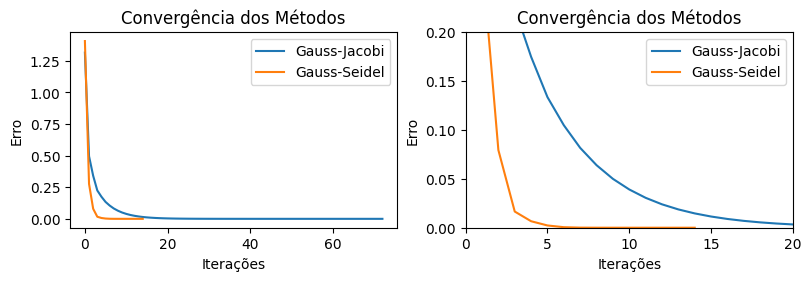

In [ ]:
# c)
# Queremos resolver o sistema de equações proposto e analisar a relação
# erro X iterações. Em especial o quão mais rápido o resultado de um método
# converge para a solução correta em relação ao outro método. Para isso
# utilizamos a função de solução do sistema e mostramos a quantidade de
# iterações feitas, bem como dois gráficos relacionando o erro com o número
# de iterações.
#
x0 = np.array([1, 0, 0, 0, 0, 0])
erro = 1e-8

# Gauss-Jacobi
x_GJ, erro_GJ = solve(x0, C_GJ, g_GJ, erro)
print(f"X_f = {x_GJ}, iterações = {erro_GJ.shape[0]}")

# Gauss-Seidel
x_GS, erro_GS = solve(x0, C_GS, g_GS, erro)
print(f"X_f = {x_GS}, iterações = {erro_GS.shape[0]}")
print("\n")

def plotter(ax, erro1, erro2, xscl, yscl):
  plt.xlim(right=xscl)
  plt.ylim(top=yscl)
  ax.plot(erro1, label='Gauss-Jacobi')
  ax.plot(erro2, label='Gauss-Seidel')
  ax.set_xlabel('Iterações')
  ax.set_ylabel('Erro')
  ax.set_title('Convergência dos Métodos')
  ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.7), layout='constrained')
plotter(ax1, erro_GJ, erro_GS, 80, 1.5)
plotter(ax2, erro_GJ, erro_GS, 20, 0.2)

Dos resultados anteriores no item 2 b), vemos que os métodos, de fato, convergem e são, portanto, bons para resolver o sistema. Resta então utilizar as matrizes e vetores determinados no item 2 a) para resolver o problema e comparar a convergência dos métodos por meio do erro a cada iteração.

Para isso, utilizamos a função *solve* que armazena o erro calculado a cada iteração e retorna tanto o resultado final quanto a lista com os erros calculados.

Em ambos os métodos, o resultado é idêntico. De fato, se ambos convergem, o esperado é que obtenhamos o mesmo resultado. A grande diferença se dá no número de iterações feitas no primeiro (73) comparado ao segundo (15).

Se observarmos o gráfico acima, podemos identificar o padrão de convergência que, para o método de _Gauss-Jacobi_ é significativamente mais demorado do que para o _Gauss-Seidel_. Se considerássemos uma tolerância menos estrita de $0.05$, por exemplo, pelo próprio gráfico podemos identificar que em algo entre 3 e 4 iterações seriam suficientes para um resultado apreciável pelo método _Gauss-Seidel_, enquanto pelo método _Gauss-Jacobi_ seriam necessárias em torno de 10 iterações.

## Exercício 3

In [ ]:
# Definições comuns para os exercícios:

def p(x):
  return -(x**4) +7.7*(x**3) -(18*(x**2)) + 13.6*x

def q(x):
  return -(x**2) + 5*x + 0.75

In [ ]:
# a)
# Queremos o impacto com maior elevação, que ocorre quando p(x) = q(x)
# ou seja, quando p(x) - q(x) = 0, o que equivale a f(x) = 0 (raiz).
# Podemos definir a função f(x), tal que:
# f(x) = p(x) - q(x)
def f(x):
  return -(x**4) + 7.7*(x**3) - (17*(x**2)) + 8.6*x - 0.75
# Assim, podemos aplicar o método da bisseção em f.

# Método da Bisseção
def bissecao(func, a, b, tol):
  # Garantindo que há raiz no intervalo [a, b]
  if func(a) * func(b) > 0:
    print('Os extremos devem ter sinais opostos!')
    return

  x = (a + b)/2
  erro = float('inf')
  k = 0 # Número de iterações

  while erro > tol and k < 1000: # Valor arbitrário para evitar loop infinito
    k += 1
    # Encontrando subintervalo
    if func(a) * func(x) < 0:
      b = x
    else:
      a = x

    # Atualizando valores
    x0 = x
    x = (a + b)/2
    erro = abs(x - x0)

  return x, k

# Resolução:
# Temos:
# Intervalo inicial tirado do gráfico dado:
a = 3.14
b = 3.20
precisao = 0.001

xRes, k = bissecao(f, a, b, precisao)
yRes = p(xRes) # Obtendo altura (dada na colisão, usar p ou q)
print('Uma aproximação para a altura usando o método da Bisseção é de: '
      + str(yRes) + ' unidades de medida.')
print('Foram feitas ' + str(k) + ' iterações.')

Uma aproximação para a altura usando o método da Bisseção é de: 6.54675177875518 unidades de medida.
Foram feitas 5 iterações.


O <u>Método da Bisseção</u> é uma técnica utilizada para encontrar as raízes de uma função. A partir de um intervalo inicial [a, b], a busca por raízes é feita dividindo esse intervalo em 2 e determinando em qual dos intervalos a raiz está. Isso é feito sucessivas vezes, até que a condição de parada (tolerância) seja satisfeita.

No exercício 3 a), implementamos o Método da Bisseção na função *bissecao*. O intervalo inicial foi definido posteriormente e tirado do gráfico dado. Garantimos que haveria raiz no intervalo inicial e que o número de iterações seria $ \le 5$, conforme foi pedido no enunciado.

In [ ]:
# b)
# Para aplicar o método de Newton para sistemas,
# podemos definir uma função F(x, y) tal que:
# F_x(x, y) = p(x) - y;
# F_y(x, y) = q(x) - y.
# O impacto ocorre quando p(x) e q(x) são iguais.
# A altura pode ser escrita como y, e é igual a p(x) no ponto x.
# Quando p(x) e q(x) são iguais, há colisão, e
# F_x e F_y são iguais a 0 (raiz).

# Agora, podemos definir:
def F(x):
  xRes = p(x[0]) - x[1]
  yRes = q(x[0]) - x[1]
  return np.array([xRes, yRes])

# Precisamos do Jacobiano de x, temos:
def Jac(x):
  # j00 é a derivada de F_x em x, ou seja, p'(x):
  j00 = -4*(x[0]**3) + 23.1*(x[0]**2) - 36*x[0] + 13.6
  # j01 é a derivada de F_x em y, ou seja, -1:
  j01 = -1
  # j10 é a derivada de F_y em x, ou seja, q'(x):
  j10 = -2*x[0] + 5
  # j11 é a derivada de F_y em y, ou seja, -1:
  j11 = -1
  return np.array([[j00, j10], [j10, j11]])

# Método de Newton para sistemas
def newton(f, jac, x, tol):
  k = 1 # Número de iterações
  while k < 1000: # Valor arbitrário para evitar loop infinito
    v = np.linalg.solve(jac(x), f(x))
    x = x - v
    # Usa-se a norma como condição de parada
    if (np.linalg.norm(v) < tol):
      return x, k
    k += 1
  # Não encontrou valor para x
  return None, k

# Resolução:
# Temos:
# Chute inicial tirado do gráfico dado:
x0 = np.array([3, p(3)])
precisao = 0.001

res, k = newton(F, Jac, x0, precisao)
print('Uma aproximação para a altura usando o método de Newton é de: '
      + str(res[1]) + ' unidades de medida.')
print('Foram feitas ' + str(k) + ' iterações.')

Uma aproximação para a altura usando o método de Newton é de: 6.547203294656269 unidades de medida.
Foram feitas 4 iterações.


O <u>Método de Newton para sistemas</u>, assim como o Método da Bisseção, é uma técnica utilizada para encontrar raízes de uma função - agora, uma função vetorial. A partir de um chute inicial $\vec{x_0}$, até que a condição de parada (tolerância) seja satisfeita, o método estima a raiz sucessivas vezes com base na recorrência:

* $J(\vec{x_k}) . \vec{v_k} = F(\vec{x_k})$

* $\vec{x_{k+1}} = \vec{x_k} - \vec{v_k}$

* onde $J(\vec{x})$ é o Jacobiano de $F(\vec{x})$

No exercício 3, implementamos o Método de Newton para sistemas na função *newton*. O chute inicial foi definido a partir do gráfico dado e garantimos que ele seria próximo da raiz desejada (impacto com maior elevação).

### Uma comparação entre os métodos utilizados

Observando os valores iniciais utilizados em cada método, bem como o número de iterações, podemos estabelecer uma comparação entre eles.

* No Método da Bisseção, para garantir um número de iterações $\le 5$, a escolha de intervalo inicial ([3.14, 3.20]) foi crítica, sendo o intervalo consideravelmente já próximo da raiz desejada.

* No Método de Newton para sistemas, a escolha de chute inicial (3) foi mais abrangente, e o número de iterações foi igual a 4, menor do que o outro método.

Sendo assim, podemos concluir que o Método de Newton para sistemas consegue ser mais eficiente do que o Método da Bisseção, visto que chegou a um resultado com mesma tolerância em menos iterações e com valor inicial mais abrangente.